In [87]:
%matplotlib inline
import dolfin as d
import matplotlib.pyplot as plt
import numpy as np

In [53]:
# for ipython notebook
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.tri as tri

def mesh2triang(mesh):
    xy = mesh.coordinates()
    return tri.Triangulation(xy[:, 0], xy[:, 1], mesh.cells())

def plot(obj):
    #plt.gca().set_aspect('equal')
    if isinstance(obj, d.Function):
        mesh = obj.function_space().mesh()
        if (mesh.geometry().dim() > 2):
            raise(AttributeError)
        if mesh.geometry().dim() == 1:
            plt.plot(mesh.geometry().x(), obj.vector().array())
        elif obj.vector().size() == mesh.num_cells():
            C = obj.vector().array()
            plt.tripcolor(mesh2triang(mesh), C)
        else:
            C = obj.compute_vertex_values(mesh)
            plt.tripcolor(mesh2triang(mesh), C, shading='gouraud')
    elif isinstance(obj, d.Mesh):
        if (obj.geometry().dim() != 2):
            raise(AttributeError)
        plt.triplot(mesh2triang(obj), color='k')


In [91]:
mesh = d.UnitIntervalMesh(1000)
F = d.FunctionSpace(mesh, 'Lagrange', 1)
u = d.TrialFunction(F)
v = d.TestFunction(F)

kappa = d.Expression('exp(sin(2*pi*x[0]))')
a = d.inner(kappa*d.nabla_grad(u), d.nabla_grad(v))*d.dx
L = d.Expression('sin(x[0])')*v*d.dx

def on_boundary(x, on_boundary):
    return (d.near(x[0], 1) or d.near(x[0], 0)) and on_boundary
bc = d.DirichletBC(F, d.Constant(1.), on_boundary)

DEBUG:FFC:Reusing form from cache.


In [92]:
u_sol = d.Function(F)
d.solve(a == L, u_sol, bc)

DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.


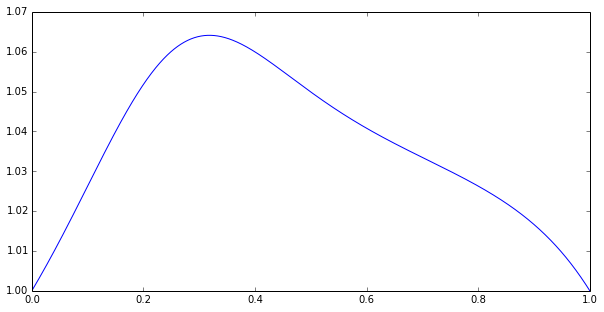

In [93]:
plt.figure(figsize=(10,5))
plot(u_sol)

In [94]:
data_points = np.linspace(0,1,11)[1:-1]
data_vals = np.vectorize(u_sol)(data_points)

In [95]:
np.savetxt('data_simple', np.c_[data_points, data_vals])